In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import uproot4 
import pandas as pd



In [2]:
file_ncpi0 = uproot4.open("ana_sp_ncpi0_fhc.root")
tree_ncpi0 = file_ncpi0["singlephotonana;1/vertex_tree;1"]

file_dm = uproot4.open("/home/lmlepin/Desktop/dm_sets/cross_validation/dm_cross_check_sp_tree.root")
tree_dm = file_dm["singlephotonana/vertex_tree;1"]

In [3]:
shower_number_ncpi0 = tree_ncpi0['reco_asso_showers'].array(library="ak")
track_number_ncpi0 = tree_ncpi0['reco_asso_tracks'].array(library='ak')
shwr_length_ncpi0 = tree_ncpi0['reco_shower_length'].array(library='ak')
shwr_max_energy_ncpi0 = tree_ncpi0['reco_shower_energy_max'].array(library='ak')
shwr_dir_x_ncpi0 = tree_ncpi0['reco_shower_dirx'].array(library='ak')
shwr_dir_y_ncpi0 = tree_ncpi0['reco_shower_diry'].array(library='ak')
shwr_dir_z_ncpi0 = tree_ncpi0['reco_shower_dirz'].array(library='ak')
shwr_vx_ncpi0 = tree_ncpi0['reco_vertex_x'].array(library='ak')
shwr_vy_ncpi0 = tree_ncpi0['reco_vertex_y'].array(library='ak')
shwr_vz_ncpi0 = tree_ncpi0['reco_vertex_z'].array(library='ak')
shwr_sx_ncpi0 = tree_ncpi0['reco_shower_startx'].array(library='ak')
shwr_sy_ncpi0 = tree_ncpi0['reco_shower_starty'].array(library='ak')
shwr_sz_ncpi0 = tree_ncpi0['reco_shower_startz'].array(library='ak')

shower_number_dm = tree_dm['reco_asso_showers'].array(library='ak')
track_number_dm= tree_dm['reco_asso_tracks'].array(library='ak')
shwr_length_dm = tree_dm['reco_shower_length'].array(library='ak')
shwr_max_energy_dm = tree_dm['reco_shower_energy_max'].array(library='ak')
shwr_dir_x_dm = tree_dm['reco_shower_dirx'].array(library='ak')
shwr_dir_y_dm = tree_dm['reco_shower_diry'].array(library='ak')
shwr_dir_z_dm = tree_dm['reco_shower_dirz'].array(library='ak')
shwr_vx_dm = tree_dm['reco_vertex_x'].array(library='ak')
shwr_vy_dm = tree_dm['reco_vertex_y'].array(library='ak')
shwr_vz_dm = tree_dm['reco_vertex_z'].array(library='ak')
shwr_sx_dm = tree_dm['reco_shower_startx'].array(library='ak')
shwr_sy_dm = tree_dm['reco_shower_starty'].array(library='ak')
shwr_sz_dm = tree_dm['reco_shower_startz'].array(library='ak')

In [4]:
shower_lengths_ncpi0 = []
shower_energy_ncpi0 = []
shower_dir_ncpi0 = []
shower_vdistance_ncpi0 = []

shower_lengths_dm = []
shower_energy_dm = []
shower_dir_dm = []
shower_vdistance_dm = []
index = 0 

dir_vect = [0.462372,
0.0488541,
0.885339
]

for i,j in zip(shower_number_ncpi0,track_number_ncpi0):
    #print(i,j)
    if(i == 1 and j==0):
        length = shwr_length_ncpi0[index][0]
        x = shwr_dir_x_ncpi0[index][0]
        y = shwr_dir_y_ncpi0[index][0]
        z = shwr_dir_z_ncpi0[index][0]
        dir_var = x*dir_vect[0] + y*dir_vect[1] + z*dir_vect[2]
        vx = shwr_vx_ncpi0[index]
        vy = shwr_vy_ncpi0[index]
        vz = shwr_vz_ncpi0[index]
        sx = shwr_sx_ncpi0[index][0]
        sy = shwr_sy_ncpi0[index][0]
        sz = shwr_sz_ncpi0[index][0]
        distance_vertex = np.sqrt( (sx - vx)**2 + (sy - vy)**2 + (sz - vz)**2)
        
        shower_dir_ncpi0.append(dir_var)
        shower_lengths_ncpi0.append(length)
        shower_energy_ncpi0.append(shwr_max_energy_ncpi0[index][0])
        shower_vdistance_ncpi0.append(distance_vertex)
    index+=1
    

index = 0
for i,j in zip(shower_number_dm,track_number_dm):
    #print(i,j)
    if(i == 1 and j==0):
        length = shwr_length_dm[index][0]
        x = shwr_dir_x_dm[index][0]
        y = shwr_dir_y_dm[index][0]
        z = shwr_dir_z_dm[index][0]
        dir_var = x*dir_vect[0] + y*dir_vect[1] + z*dir_vect[2]
        
        vx = shwr_vx_dm[index]
        vy = shwr_vy_dm[index]
        vz = shwr_vz_dm[index]
        sx = shwr_sx_dm[index][0]
        sy = shwr_sy_dm[index][0]
        sz = shwr_sz_dm[index][0]
        distance_vertex = np.sqrt( (sx - vx)**2 + (sy - vy)**2 + (sz - vz)**2)
        
        shower_dir_dm.append(dir_var)
        shower_lengths_dm.append(length)
        shower_energy_dm.append(shwr_max_energy_dm[index][0])
        shower_vdistance_dm.append(distance_vertex)
    index+=1    

In [6]:
pot_target = 2.0e+21
pot_signal_ncpi0 = 4.32327e+21 
n_pi0_trials = 59246129
n_eta_trials =  28003407 
# 100 because we have 100 files (?)
pot_signal_dm = ((500000.*(n_pi0_trials + n_eta_trials)*100/1525299.)/ 9.7955000e-10)/2.2219429e-06 #10 added to match the numbers 
weight_ncpi0 = pot_target/pot_signal_ncpi0
weight_dm = pot_target/pot_signal_dm
print('NCPI0 weight ', weight_ncpi0)
print('DM weigth', weight_dm)

shower_lengths_ncpi0 = np.array(shower_lengths_ncpi0)
shower_energy_ncpi0 = np.array(shower_energy_ncpi0)
shower_energy_ncpi0 = shower_energy_ncpi0/1000
shower_dir_ncpi0 = np.array(shower_dir_ncpi0)

shower_lengths_dm = np.array(shower_lengths_dm)
shower_energy_dm = np.array(shower_energy_dm)
shower_energy_dm = shower_energy_dm/1000
shower_dir_dm = np.array(shower_dir_dm)

NCPI0 weight  0.4626127907810523
DM weigth 0.001521988440365352


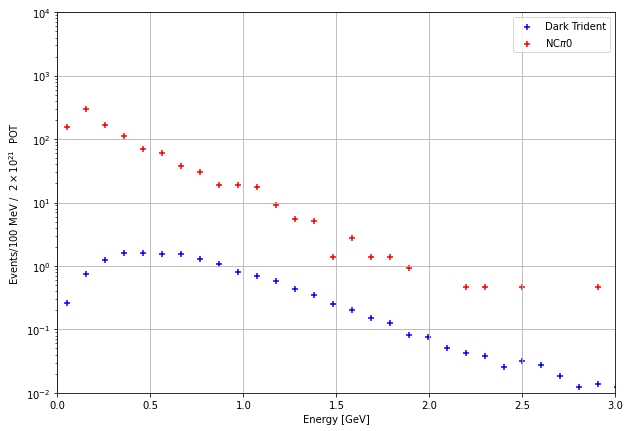

In [18]:
(counts_dm, bins_dm) = np.histogram(shower_energy_dm, bins=np.linspace(0,5,50))
(counts_ncpi0, bins_ncpi0) = np.histogram(shower_energy_ncpi0, bins=np.linspace(0,5,50))

plt.figure(figsize=(10,7))
plt.grid()
#plt.hist(bins_dm[:-1], bins_dm, weights=weight_dm*counts_dm,color='b',alpha=0.75)
#plt.hist(bins_ncpi0[:-1], bins_ncpi0, weights=weight_ncpi0*counts_ncpi0,color='r',alpha=0.75)
plt.scatter(bins_dm[:-1]+ 0.5*(bins_dm[1:] - bins_dm[:-1]), weight_dm*counts_dm, marker='+', c='b', s=40, alpha=1,label='Dark Trident')
plt.scatter(bins_ncpi0[:-1]+ 0.5*(bins_ncpi0[1:] - bins_ncpi0[:-1]), weight_ncpi0*counts_ncpi0, marker='+', c='r', s=40, alpha=1,label =r'NC$\pi0$')
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel(r'Events/100 MeV /  $2 \times 10^{21}$  POT')
plt.xlim(0.,3.)
plt.ylim(0.01,10000)
plt.legend()
plt.show()

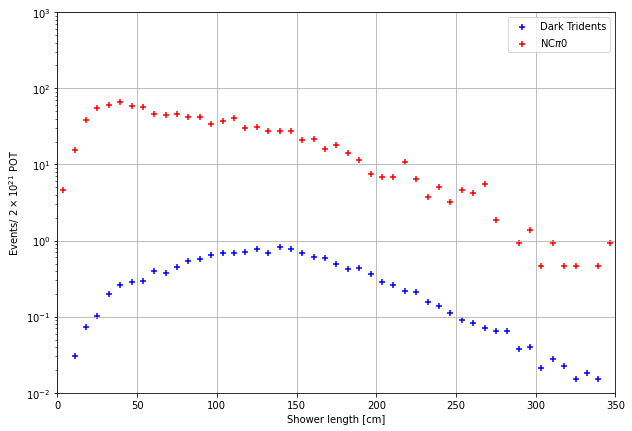

In [8]:
(counts_dm, bins_dm) = np.histogram(shower_lengths_dm, bins=np.linspace(0,350,50))
(counts_ncpi0, bins_ncpi0) = np.histogram(shower_lengths_ncpi0, bins=np.linspace(0,350,50))

plt.figure(figsize=(10,7))
plt.grid()
#plt.hist(bins_dm[:-1], bins_dm, weights=weight_dm/0.1*counts_dm,color='b',alpha=0.75)
#plt.hist(bins_ncpi0[:-1], bins_ncpi0, weights=weight_ncpi0/0.1*counts_ncpi0,color='r',alpha=0.75)
plt.scatter(bins_dm[:-1]+ 0.5*(bins_dm[1:] - bins_dm[:-1]), weight_dm*counts_dm, marker='+', c='b', s=40, alpha=1,label='Dark Tridents')
plt.scatter(bins_ncpi0[:-1]+ 0.5*(bins_ncpi0[1:] - bins_ncpi0[:-1]), weight_ncpi0*counts_ncpi0, marker='+', c='r', s=40, alpha=1,label = r'NC$\pi0$')
plt.yscale('log')
plt.xlabel('Shower length [cm]')
plt.ylabel(r'Events/ $2\times 10^{21}$ POT')
plt.xlim(0.,350)
plt.ylim(0.01,1000)
plt.legend()
plt.show()

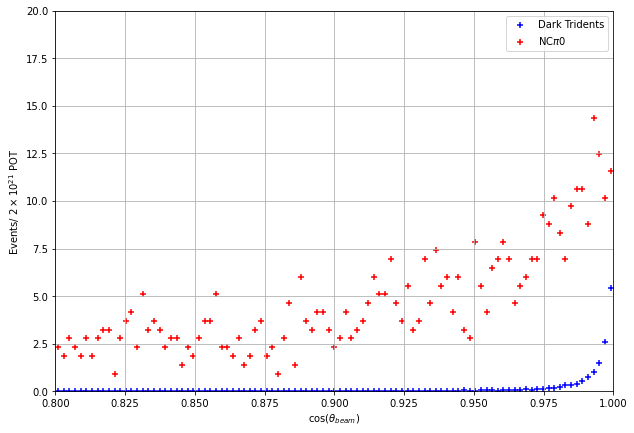

In [9]:
(counts_dm, bins_dm) = np.histogram(shower_dir_dm, bins=np.linspace(0.8,1.0,100))
(counts_ncpi0, bins_ncpi0) = np.histogram(shower_dir_ncpi0, bins=np.linspace(0.8,1.,100))

plt.figure(figsize=(10,7))
plt.grid()
#plt.hist(bins_dm[:-1], bins_dm, weights=weight_dm/0.1*counts_dm,color='b',alpha=0.75)
#plt.hist(bins_ncpi0[:-1], bins_ncpi0, weights=weight_ncpi0/0.1*counts_ncpi0,color='r',alpha=0.75)
plt.scatter(bins_dm[:-1]+ 0.5*(bins_dm[1:] - bins_dm[:-1]), weight_dm*counts_dm, marker='+', c='b', s=40, alpha=1,label='Dark Tridents')
plt.scatter(bins_ncpi0[:-1]+ 0.5*(bins_ncpi0[1:] - bins_ncpi0[:-1]), weight_ncpi0*counts_ncpi0, marker='+', c='r', s=40, alpha=1,label=r'NC$\pi0$')
#plt.yscale('log')
plt.xlabel(r'cos($\theta_{beam}$)')
plt.ylabel(r'Events/ $2\times 10^{21}$ POT')
plt.xlim(0.8,1.0)
plt.ylim(0.0,20)
plt.legend()
plt.show()

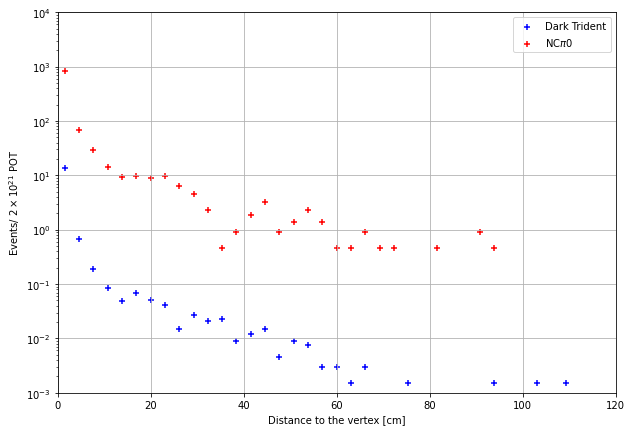

In [10]:
(counts_dm, bins_dm) = np.histogram(shower_vdistance_dm, bins=np.linspace(0.,120,40))
(counts_ncpi0, bins_ncpi0) = np.histogram(shower_vdistance_ncpi0, bins=np.linspace(0.,120,40))

plt.figure(figsize=(10,7))
plt.grid()
#plt.hist(bins_dm[:-1], bins_dm, weights=weight_dm/0.1*counts_dm,color='b',alpha=0.75)
#plt.hist(bins_ncpi0[:-1], bins_ncpi0, weights=weight_ncpi0/0.1*counts_ncpi0,color='r',alpha=0.75)
plt.scatter(bins_dm[:-1]+ 0.5*(bins_dm[1:] - bins_dm[:-1]), weight_dm*counts_dm, marker='+', c='b', s=40, alpha=1,label='Dark Trident')
plt.scatter(bins_ncpi0[:-1]+ 0.5*(bins_ncpi0[1:] - bins_ncpi0[:-1]), weight_ncpi0*counts_ncpi0, marker='+', c='r', s=40, alpha=1,label=r'NC$\pi0$')
plt.yscale('log')
plt.xlabel(r'Distance to the vertex [cm]')
plt.ylabel(r'Events/ $2\times 10^{21}$ POT')
plt.xlim(0.,120.)
plt.ylim(0.001,10000)
plt.legend()
plt.show()